# Default of Credit Card Clients Dataset

Dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#) 

### Import data, inspect, and rename columns

In [121]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500) #view all columns
pd.set_option('display.max_rows', 500) #view all columns

In [122]:
df = pd.read_excel('data/default_of_credit_card_clients.xls', header = 1)
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [123]:
df.rename(columns={'default payment next month':'DEFAULT','PAY_0':'PAY_1'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Columns: 
- **ID**: Customer ID
- **LIMIT_BAL**: Amount of the given credit (NT dollar)
- **SEX**: 1 = male, 2 = female
- **EDUCATION**: 1 = graduate school; 2 = university; 3 = high school; 4 = others
- **MARRIAGE**: 1 = married; 2 = single; 3 = others
- **PAY_i**: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: Pay_1 = the repayment status in September, 2005; Pay_2 = the repayment status in August, 2005; . . .; Pay_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above
- **BILL_AMTi**: Amount of bill statement (NT dollar). Bill_AMT1 = amount of bill statement in September, 2005; Bill_AMT6 = amount of bill statement in August, 2005; . . .; Bill_AMT6 = amount of bill statement in April, 2005
- **PAY_AMTi**: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.
- **DEFAULT**: default payment next month

In [124]:
print(df.shape, '\n')
# df.info()
# df.describe()
for col in df.columns:    # loop through columns
    print(f'"{col}" Value Counts:\n',
          df[col].value_counts(normalize=True).head(),
          '\n NumUnique:', df[col].nunique(), '\n')
# ascending = True for extraneous values

(30000, 25) 

"ID" Value Counts:
 2047     0.000033
1322     0.000033
15629    0.000033
9486     0.000033
11535    0.000033
Name: ID, dtype: float64 
 NumUnique: 30000 

"LIMIT_BAL" Value Counts:
 50000     0.112167
20000     0.065867
30000     0.053667
80000     0.052233
200000    0.050933
Name: LIMIT_BAL, dtype: float64 
 NumUnique: 81 

"SEX" Value Counts:
 2    0.603733
1    0.396267
Name: SEX, dtype: float64 
 NumUnique: 2 

"EDUCATION" Value Counts:
 2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
Name: EDUCATION, dtype: float64 
 NumUnique: 7 

"MARRIAGE" Value Counts:
 2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64 
 NumUnique: 4 

"AGE" Value Counts:
 29    0.053500
27    0.049233
28    0.046967
30    0.046500
26    0.041867
Name: AGE, dtype: float64 
 NumUnique: 56 

"PAY_1" Value Counts:
  0    0.491233
-1    0.189533
 1    0.122933
-2    0.091967
 2    0.088900
Name: PAY_1, dtype: float64 
 NumUnique: 11 

"PAY_2

Notes on df.info():
- all dtypes are int64
- no proper missing values

Notes on df.describe() and value counts:
- 78% default
- 60% women
- education: 47% grad school, 35% university, 16% high school, 1% 5 (unknown value), .5% others (4)
- marriage: 53% single, 46% married, 1% others, .2% 0 (unknown value)
- pay_i: 50-55% 0, 18-20% paid on time (-1)

In [64]:
for col in df.columns: # loop through columns
    if len(df[col].unique()) <= 10:
        print(f'"{col}" Unique:\n', df[col].unique(), '\n')

"SEX" Unique:
 [0 1] 

"EDUCATION" Unique:
 [2 1 3 5 4 6 0] 

"MARRIAGE" Unique:
 [1 2 3 0] 

"PAY_5" Unique:
 [-2  0 -1  2  3  5  4  7  8  6] 

"PAY_6" Unique:
 [-2  2  0 -1  3  6  4  7  8  5] 

"DEFAULT" Unique:
 [1 0] 



- For EDUCATION and MARRIAGE, 0 likely means missing/unknown data. Very few rows have these values so we will drop
- For EDUCATION, 5 and 6 are unknown/unspecified values. Very few rows have these values so we will drop these too.
- For PAY_i, -2 is unspecified. Many rows have these values, so we will keep.

### Remove missing/unknown values

In [65]:
df = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)
                    & (df['EDUCATION'] != 5) & (df['EDUCATION'] != 6)]
len(df)

29601

In [ ]:
df.to_csv('data/clean_data.csv')

Notes:
- link data set in readme

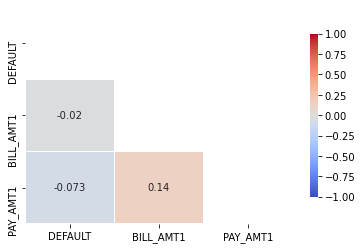

In [133]:
mask = np.zeros_like(df[['DEFAULT','BILL_AMT1','PAY_AMT1']].corr())
mask[np.triu_indices_from(mask)] = True
sns.axes_style("white")
f, ax = plt.subplots()
ax = sns.heatmap(df[['DEFAULT','BILL_AMT1','PAY_AMT1']].corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, annot=True, vmin = -1, vmax=1, cbar_kws = {"shrink": .75})

### Extra Notes

In [ ]:
def categorize_columns(df, cols, current_vals, new_vals):
    for col in cols:
        df[col] = df[col].replace(dict(zip(current_vals, new_vals)))
    return df